# AUTHOR
***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

- **date: 2022-04-16**

# Summary

The distance from point $\mathbf{x}$ to the hyperplane $\mathbf{w}^T\mathbf{x} + b = 0$ is 

  $~~~~~~~~~~~~~\frac{|\mathbf{w}^T\mathbf{x}_0 + b|}{||\mathbf{w}||_2}$

Margin is the closest distance from a point to that surface (hyperplane) (no matter which point in the two classes):

  $~~~~~\text{margin} = \min_{n} \frac{y_n(\mathbf{w}^T\mathbf{x}_n + b)}{||\mathbf{w}||_2}$

$⇒$ Optimization Problem: 

$~~~~(\mathbf{w}, b) = \arg\max_{\mathbf{w}, b} \left\{
    \min_{n} \frac{y_n(\mathbf{w}^T\mathbf{x}_n + b)}{||\mathbf{w}||_2} 
\right\}
= \arg\max_{\mathbf{w}, b}\left\{
    \frac{1}{||\mathbf{w}||_2} \min_{n} y_n(\mathbf{w}^T\mathbf{x}_n + b)
\right\} ~~~ (1)$

Assuming $y_n(\mathbf{w}^T\mathbf{x}_n + b) = 1$ with points closest to the hyperplane. Thus, for all $n$, We have: $y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1$

$(1) ⇔ \begin{eqnarray}
    (\mathbf{w}, b) &=& \arg \max_{\mathbf{w}, b} \frac{1}{||\mathbf{w}||_2}   \ 
    \text{subject to:}~ && y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1, \forall n = 1, 2, \dots, N ~~~~(2)
\end{eqnarray}$ 

$⇔\begin{eqnarray}
    (\mathbf{w}, b) &=& \arg \min_{\mathbf{w}, b} \frac{1}{2}||\mathbf{w}||_2^2   \ 
    \text{subject to:}~ && 1 - y_n(\mathbf{w}^T\mathbf{x}_n + b) \leq 0, \forall n = 1, 2, \dots, N ~~~~ (3)
\end{eqnarray}$

- Use CVXOPT library to solve Quadratic Programming 

Find class for a new data point: $\text{class}(\mathbf{x}) = \text{sgn} (\mathbf{w}^T\mathbf{x} + b )$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from cvxopt import matrix, solvers
from scipy.spatial.distance import cdist

In [ ]:
means = [[0, 0], [2, 2]]

cov = [[.5, .1],
       [.1, .5]]

N = 20

X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.array([[1.] * N + [-1.] * N])

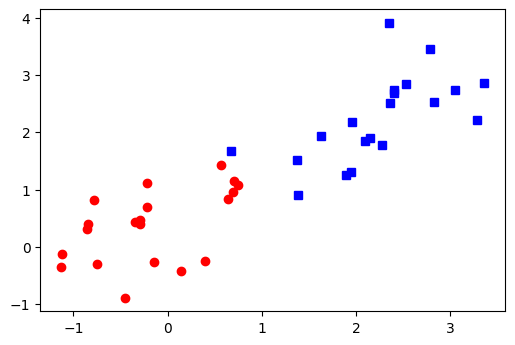

In [ ]:
plt.figure(dpi = 100)

plt.plot(X0[0], X0[1], 'ro')
plt.plot(X1[0], X1[1], 'bs')

plt.show()

In [ ]:
V = np.concatenate((X0, -X1), axis = 1)
K = matrix(V.T @ V)

p = matrix(-np.ones((2*N, 1)))

G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y)
b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

In [ ]:
eps = 1e-6

l = np.array(sol['x'])

index = np.where(l > eps)[0]

Vi = V[:, index]
Xi = X[:, index]
yi = y[:, index]
li = l[index]

In [ ]:
w = Vi @ li
b = np.mean(yi.T - w.T @ Xi)
print(w.T)
print(b)

[[-5.90792054 -5.44559507]]
12.089693236127305


In [ ]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
descrb = ['s', 'o', '^', 'p', '<', '.', 'x', '*']

def visualize(X, y, C, a, b, lv):

  plt.figure(figsize=(10, 10))

  N = 200
  kc = 0.02
  x_ = np.arange(a, b, kc)
  y_ = np.arange(a, b, kc)
  l = len(x_)

  x_, y_ = np.meshgrid(x_, y_)
  xx = x_.reshape(-1)
  yy = y_.reshape(-1)
  X1 = np.vstack((xx, yy))
  z = classify(X1)
  z = z.reshape(l, l)

  plt.contourf(x_, y_, z, lv, cmap='jet', alpha = .3)
  
  Xt1 = X[:, y[0] == 1]
  Xt2 = X[:, y[0] == -1]

  plt.plot(Xt1[0], Xt1[1], 'ro', markeredgecolor = 'k')
  plt.plot(Xt2[0], Xt2[1], 'bs', markeredgecolor = 'k')

  plt.show()

def classify(X1):
  return np.sign(w.T @ X1 + b)


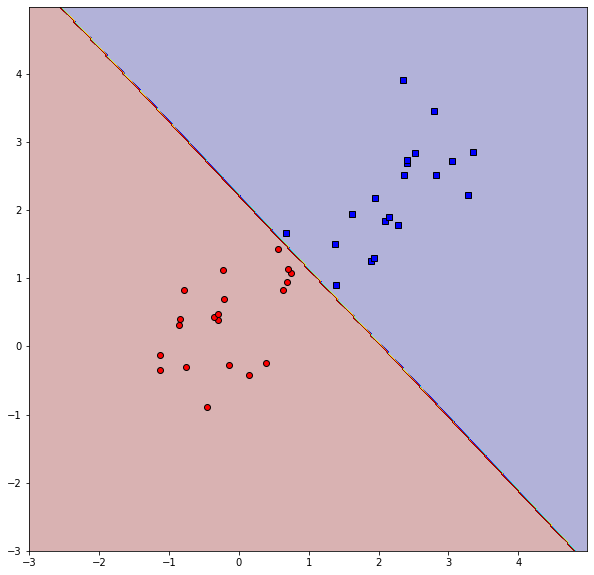

In [ ]:
visualize(X, y, 2, -2, 5, 100)